<h1 style="color:#e50914; font-weight:900; text-align:center; font-family:Arial;">
    Netflix Data Analysis and Recommendations Project
</h1>

<div style="text-align:center;">
    <img src="https://images.ctfassets.net/y2ske730sjqp/1aONibCke6niZhgPxuiilC/2c401b05a07288746ddf3bd3943fbc76/BrandAssets_Logos_01-Wordmark.jpg?w=940" width="350">
</div>

## Introduction:

#### This project focuses on analyzing a Netflix Movies and TV Shows dataset obtained from Kaggle. The primary objective is to explore and uncover trends in the content added to Netflix’s catalog over time.

#### Using Python, I perform exploratory data analysis (EDA) and build visualizations that help narrate key insights. Throughout the process, my approach emphasizes two goals:

#### Keeping the analysis straightforward and easy to follow.

#### Creating clear, visually appealing charts that effectively highlight important findings and support storytelling.

## <span style="color:#FF0000">Required Libraries:</span>

In [254]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [255]:
netflix_data = pd.read_csv("netflix_titles.csv")

In [256]:
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [257]:
netflix_data.shape

(8807, 12)

In [258]:
print(netflix_data.info(), "\n")
print(netflix_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description   

In [259]:
netflix_data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [260]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [261]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [262]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

## <span style="color:#FF0000">Analyzing the Netflix_Data:</span> 

#### Netflix Data Null Percentage Analysis

#### Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. The column names and their corresponding null percentages make it easy to identify which columns have the most missing data.

In [263]:
null_counts = netflix_data.isnull().sum()
total_rows = len(netflix_data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


##### The high percentage of missing data in the "director" may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete.

 ##### Imputation of Missing Values in the Netflix Dataset

 ##### Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [264]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [265]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [267]:
netflix_data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

Segmentation of Netflix Dataset into TV Shows and Movies

The Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'type' column, which indicates whether a given entry is a "TV Show" or a "Movie."

In [268]:
tv_show = netflix_data[netflix_data['type']== 'TV Show']
movie = netflix_data[netflix_data['type']== 'Movie']

In [269]:
display(movie.head(4), '&')
display(tv_show.head(4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


'&'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [270]:
movies_df = netflix_data[netflix_data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [271]:
netflix_data.columns = netflix_data.columns.str.upper()


In [272]:
netflix_data

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## <span style="color:#FF0000"><b>Analyses and Visualizations:</b></span>

### <span style="color:#FF0000"><b>1. The Growth of Netflix:</b></span>


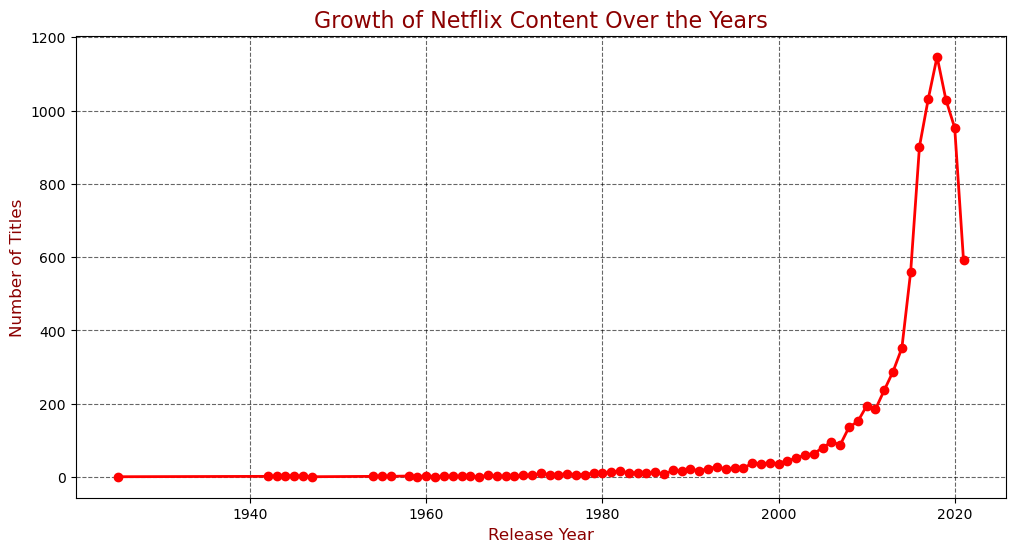

In [273]:
# Count number of titles by release year
growth = netflix_data['RELEASE_YEAR'].value_counts().sort_index()

# Plot the growth with red theme
plt.figure(figsize=(12,6))
plt.plot(growth.index, growth.values, marker='o', color='red', linewidth=2, markersize=6)

plt.title("Growth of Netflix Content Over the Years", fontsize=16, color='darkred')
plt.xlabel("Release Year", fontsize=12, color='darkred')
plt.ylabel("Number of Titles", fontsize=12, color='darkred')

plt.grid(True, linestyle='--', alpha=0.6, color='black')
plt.show()


##### This project provides a comprehensive analysis of Netflix movie content across various countries. By categorizing films into target audience groups based on age, it reveals content distribution patterns. The heatmap visualization effectively highlights which countries have a higher concentration of titles for specific demographics. This analysis offers key insights for strategic content planning and marketing.

### <span style="color:#FF0000"><b>2. Content Preferences on Netflix: Movies vs. TV Shows:</b></span>

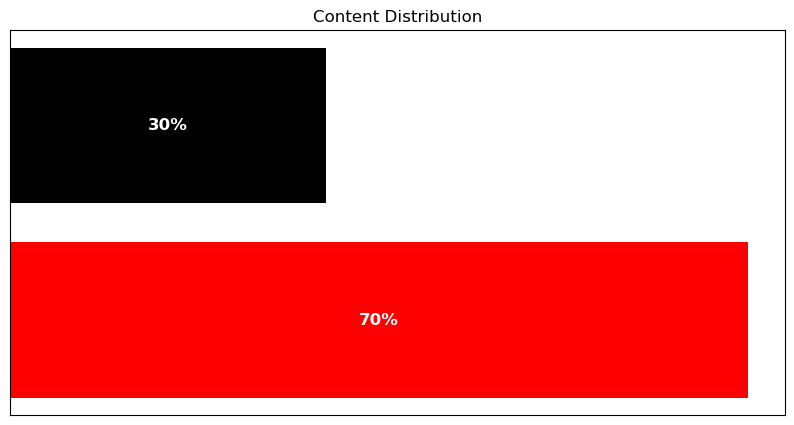

In [300]:
# Data
categories = ['Movie', 'TV Show']
percentages = [70, 30]

# Create horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(categories, percentages, color=['red', 'black'])

# Remove axis labels
plt.xlabel('')
plt.ylabel('')

# Remove x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

# Title only
plt.title('Content Distribution')

# Add percentage text on bars (inside the boxes)
for index, value in enumerate(percentages):
    plt.text(value/2, index, f'{value}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()


##### This project provides a comprehensive analysis of Netflix's content catalog. It examines the distribution of movies and TV shows across different countries. The analysis focuses on how content is tailored to various target audience groups, from kids to mature viewers. This work offers valuable insights into Netflix's global content strategy and audience segmentation.

### <span style="color:#FF0000"><b>3. Top 5 Popular Genres:</b></span>

In [275]:
genre_counts = netflix_data['LISTED_IN'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- LISTED_IN
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


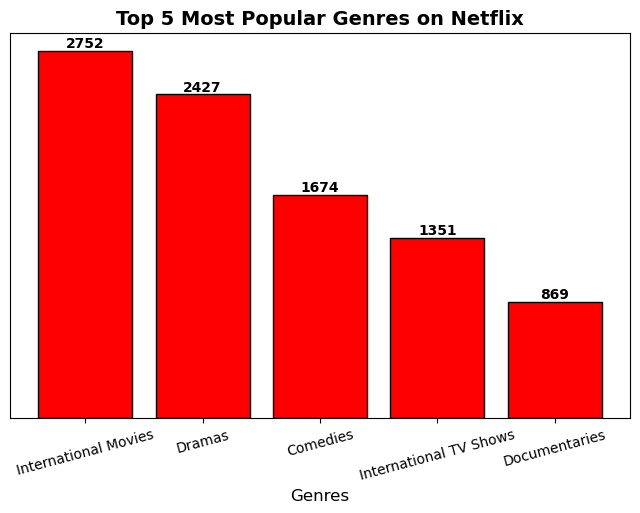

In [322]:
# Get top 5 genres
genre_counts = netflix_data['LISTED_IN'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)

# Plot with smaller bar width
plt.figure(figsize=(8, 5))
bars = plt.bar(top_5_genres.index, top_5_genres.values, color='red', edgecolor='black', width=0.8)

# Title and labels
plt.title('Top 5 Most Popular Genres on Netflix', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Genres', fontsize=12, color='black')

# White background
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

# Remove y-axis labels (counts)
plt.yticks([])

# Keep x-axis labels in black
plt.xticks(color='black', fontsize=10, rotation=15)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, 
             f'{height}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.show()


#### The top 5 most popular genres in the dataset, based on the number of titles available on Netflix, are as follows:

#### <span style="color:black"><b>• International Movies with 2752 titles</b></span>  
#### <span style="color:black"><b>• Dramas with 2427 titles</b></span>  
#### <span style="color:black"><b>• Comedies with 1674 titles</b></span>  
#### <span style="color:black"><b>• International TV Shows with 1351 titles</b></span>  
#### <span style="color:black"><b>• Documentaries with 869 titles</b></span>

#### These genres have a significant presence in the Netflix content library, with International Movies being the most prominent, followed by Dramas and Comedies. International TV Shows and Documentaries also have a substantial number of titles available on the platform, making them among the top genres on Netflix.

### <span style="color:#FF0000"><b>4. Top 5 popular actors:</b></span>

In [276]:
cast_counts = netflix_data['CAST'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)

Top 5 most popular genres:- CAST
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Name: count, dtype: int64


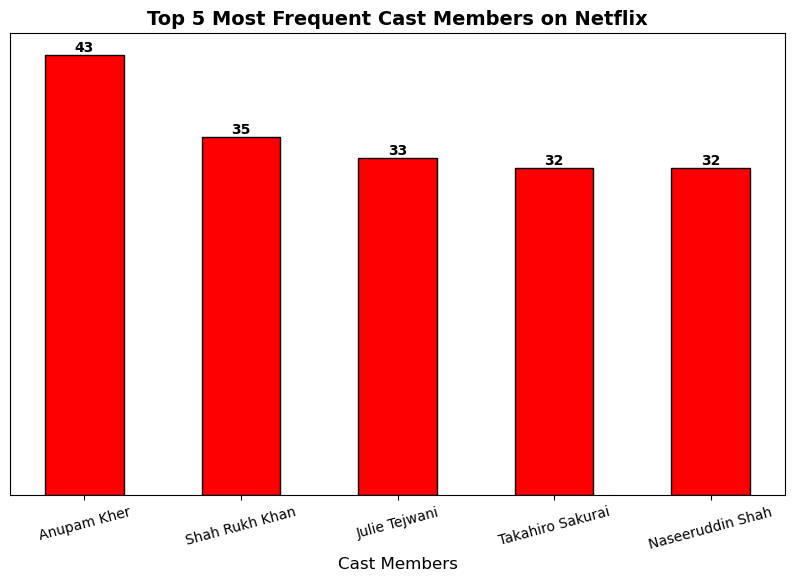

In [329]:
# Get top 5 cast members
cast_counts = netflix_data['CAST'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)

# Plot Bar Graph with smaller bar width
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cast.index, top_5_cast.values, color='red', edgecolor='black', width=0.5)

# Title and labels
plt.title('Top 5 Most Frequent Cast Members on Netflix', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Cast Members', fontsize=12, color='black')

# White background
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

# Remove y-axis ticks for cleaner look
plt.yticks([])

# X-axis labels styling
plt.xticks(color='black', fontsize=10, rotation=15)

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0, 
             f'{height}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.show()


#### The top 5 most popular actors in the dataset, based on the number of appearances in Netflix content, are as follows:

#### <span style="color:#000000"><b>• Anupam Kher with 43 appearances</b></span>  
#### <span style="color:#000000"><b>• Shah Rukh Khan with 35 appearances</b></span>  
#### <span style="color:#000000"><b>• Julie Tejwani with 33 appearances</b></span>  
#### <span style="color:#000000"><b>• Naseeruddin Shah with 32 appearances</b></span>

#### These actors have a significant presence in Netflix content, with Anupam Kher being the most prolific with 43 appearances. It's clear that they are well-represented in the platform's offerings, making them prominent figures in the world of Netflix entertainment.

### <span style="color:#FF0000"><b>5.Top 5 Directors:</b></span>

In [277]:
director_counts = netflix_data['DIRECTOR'].str.split(', ').explode().value_counts()
top_5_director = director_counts.head(5)
print("Top 5 most popular genres:-", top_5_director)

Top 5 most popular genres:- DIRECTOR
Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Marcus Raboy     16
Suhas Kadav      16
Name: count, dtype: int64


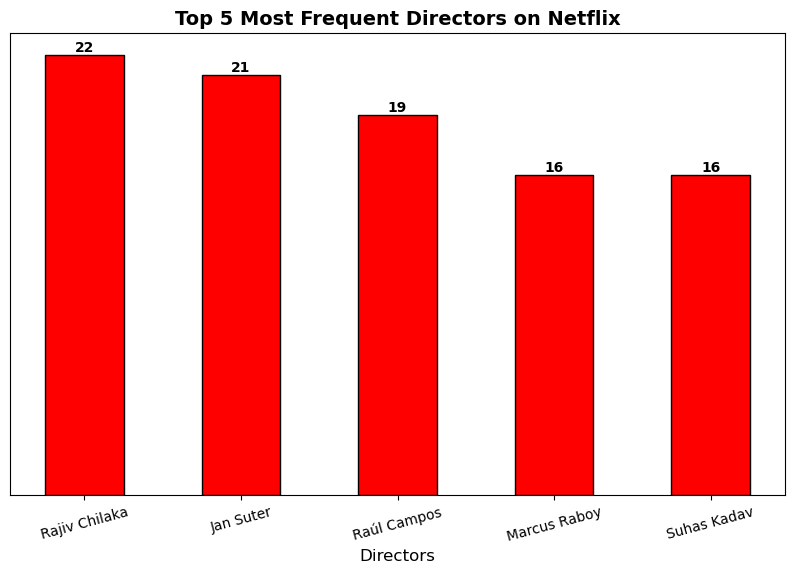

In [330]:
# Get top 5 directors
cast_counts = netflix_data['DIRECTOR'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)

# Plot Bar Graph with smaller bar width
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cast.index, top_5_cast.values, color='red', edgecolor='black', width=0.5)

# Title and labels
plt.title('Top 5 Most Frequent Directors on Netflix', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Directors', fontsize=12, color='black')

# White background
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

# Remove y-axis ticks for cleaner look
plt.yticks([])

# X-axis labels styling
plt.xticks(color='black', fontsize=10, rotation=15)

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0, 
             f'{height}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.show()


### <span style="color:#FF0000"><b>6. Top 5 Countries:</b></span>

In [278]:
country_counts = netflix_data['COUNTRY'].str.split(', ').explode().value_counts()
top_5_country = country_counts.head(5)
print("Top 5 most popular genres:-", top_5_country)

Top 5 most popular genres:- COUNTRY
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Name: count, dtype: int64


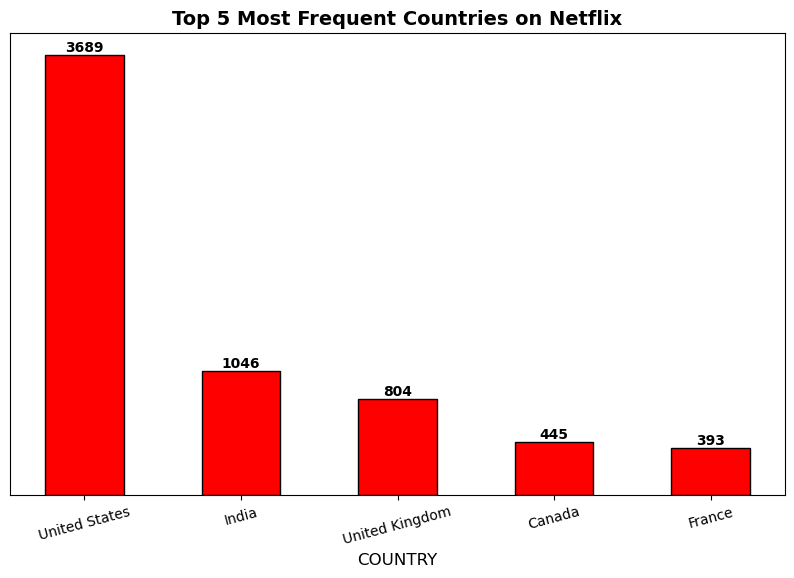

In [331]:
# Get top 5 Countries
cast_counts = netflix_data['COUNTRY'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)

# Plot Bar Graph with smaller bar width
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cast.index, top_5_cast.values, color='red', edgecolor='black', width=0.5)

# Title and labels
plt.title('Top 5 Most Frequent Countries on Netflix', fontsize=14, fontweight='bold', color='black')
plt.xlabel('COUNTRY', fontsize=12, color='black')

# White background
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

# Remove y-axis ticks for cleaner look
plt.yticks([])

# X-axis labels styling
plt.xticks(color='black', fontsize=10, rotation=15)

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0, 
             f'{height}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.show()


### <span style="color:#FF0000"><b>7. Data Types Distribution in Netflix Dataset:</b></span>
   
##### The code generates a pie chart to visualize the distribution of data types within the Netflix dataset. Specifically, it provides insights into the number of columns in the dataset that belong to each data type category.

In [279]:
data_types_counts = netflix_data.dtypes.astype(str).value_counts()

fig = go.Figure(
    data=[go.Pie(
        labels=data_types_counts.index,
        values=data_types_counts.values,
        marker=dict(colors=["red", "black"]),  # red & black slices
        textfont=dict(color="white", size=18), # bigger text
    )]
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    textfont_size=18,
    pull=0.03  # slight pull for better visibility
)

fig.update_layout(
    title_text="Data Types Distribution",
    title_font=dict(color="red", size=24),
    paper_bgcolor="white",
    plot_bgcolor="black",
    legend=dict(font=dict(color="black", size=16)),
    height=600,  # increase chart height
    width=600    # increase chart width
)

fig.show()


 ### <span style="color:#FF0000"><b>8. Netflix Content Release Year Distribution:</b></span>

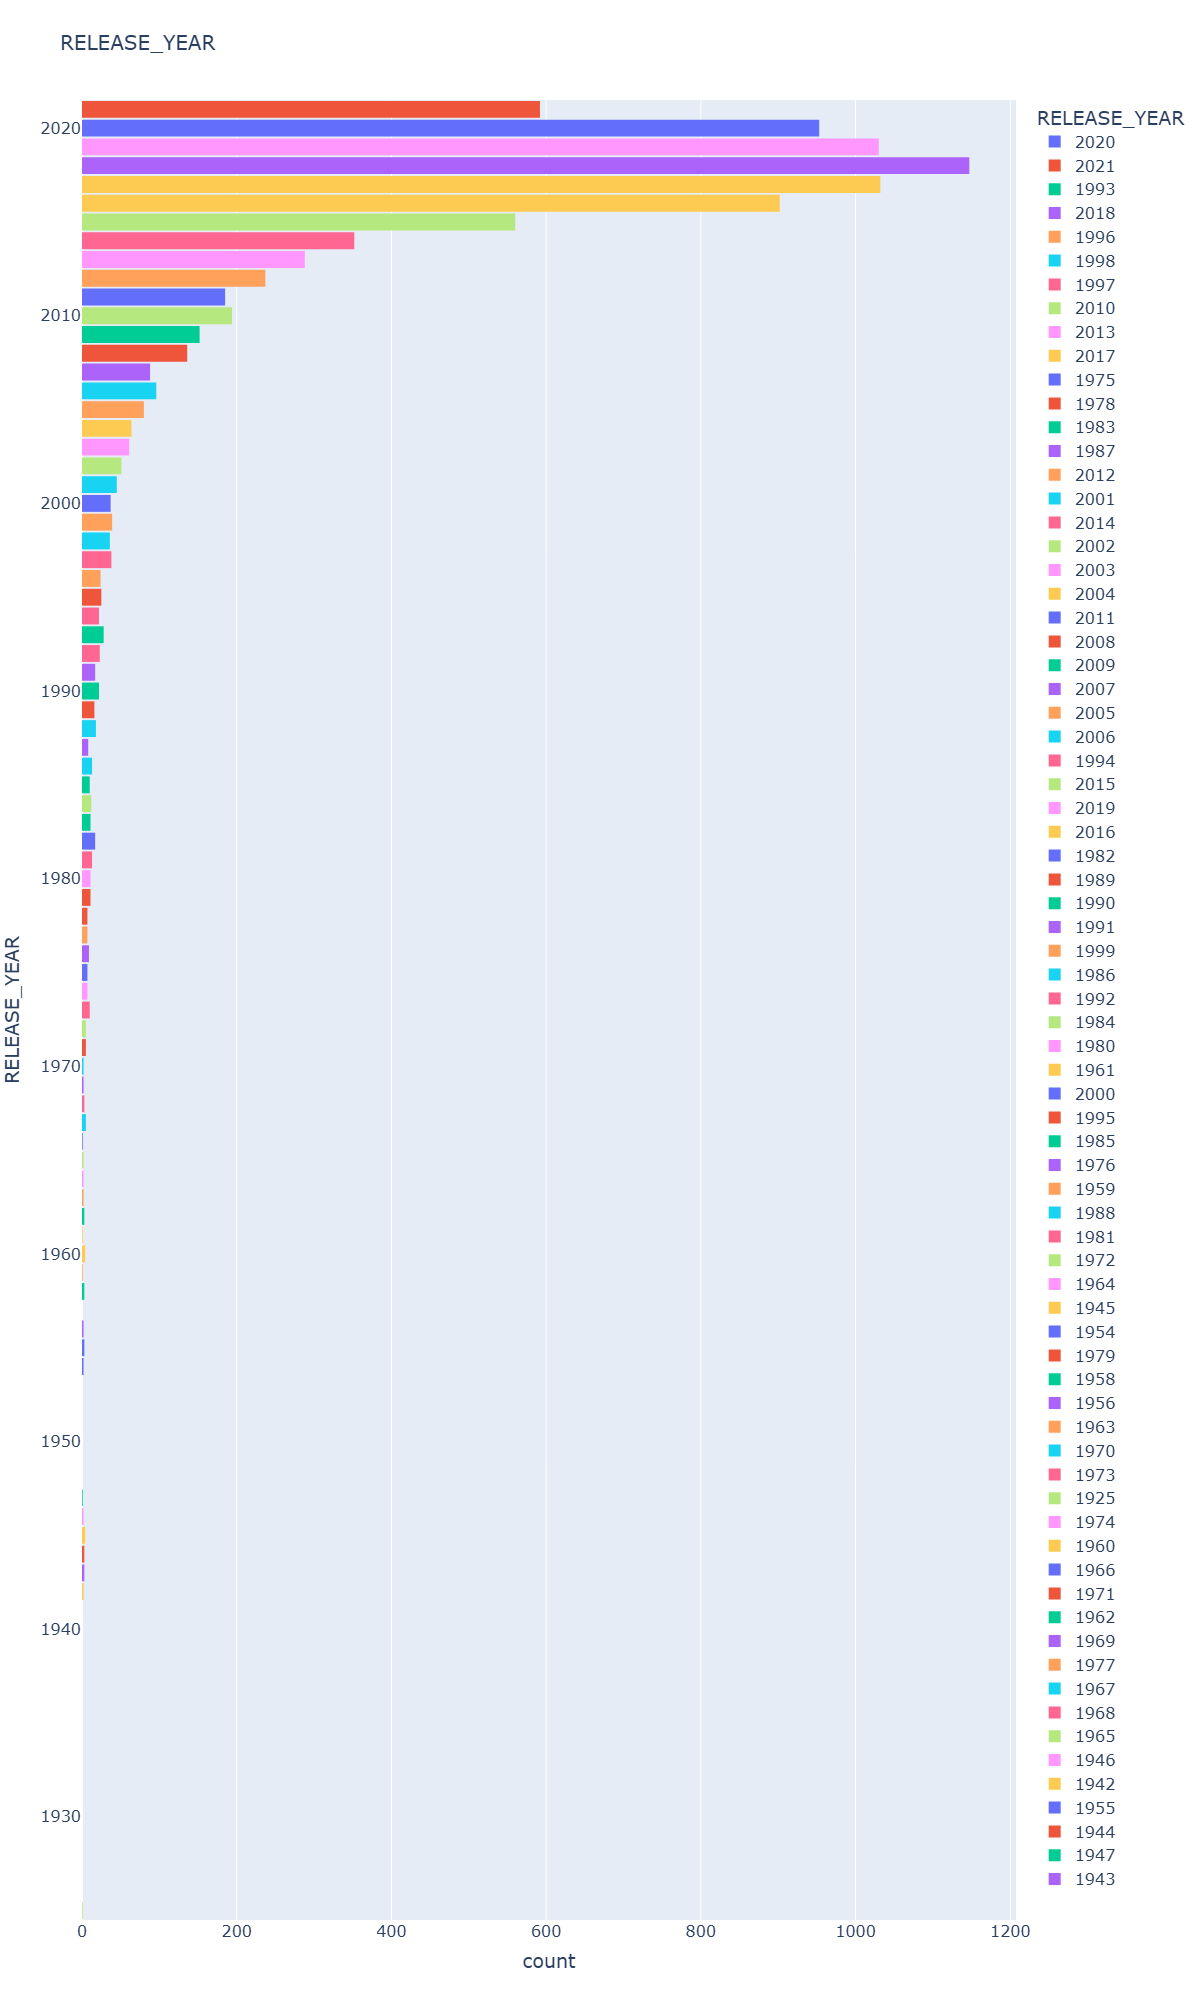

In [340]:
import plotly.express as px

# Filter out years 1930 and 1940
filtered_data = netflix_data[~netflix_data['RELEASE_YEAR'].isin([1930, 1940])]

# Create histogram
fig = px.histogram(
    filtered_data,
    y="RELEASE_YEAR",
    title="RELEASE_YEAR",
    color="RELEASE_YEAR"
)

fig.update_layout(
    bargap=0.1,
    height=2000,
    width=1000,
    title_font=dict(size=20),
    font=dict(size=16)
)

# Export to standalone HTML
fig.write_html("netflix_release_year_histogram.html", include_plotlyjs='cdn', full_html=True)

# Optional: display in notebook as well
fig.show()


##### Generates a histogram using the Plotly Express library to visualize the distribution of Netflix content based on the release year. Each bar in the histogram represents the count of content items released in a particular year. The 'release_year' column from the Netflix dataset is used as the x-axis, and each bar's color represents the corresponding release year.

 ### <span style="color:#FF0000"><b>9. Distribution of Netflix Content by Country with Box Plot Marginals:</b></span>

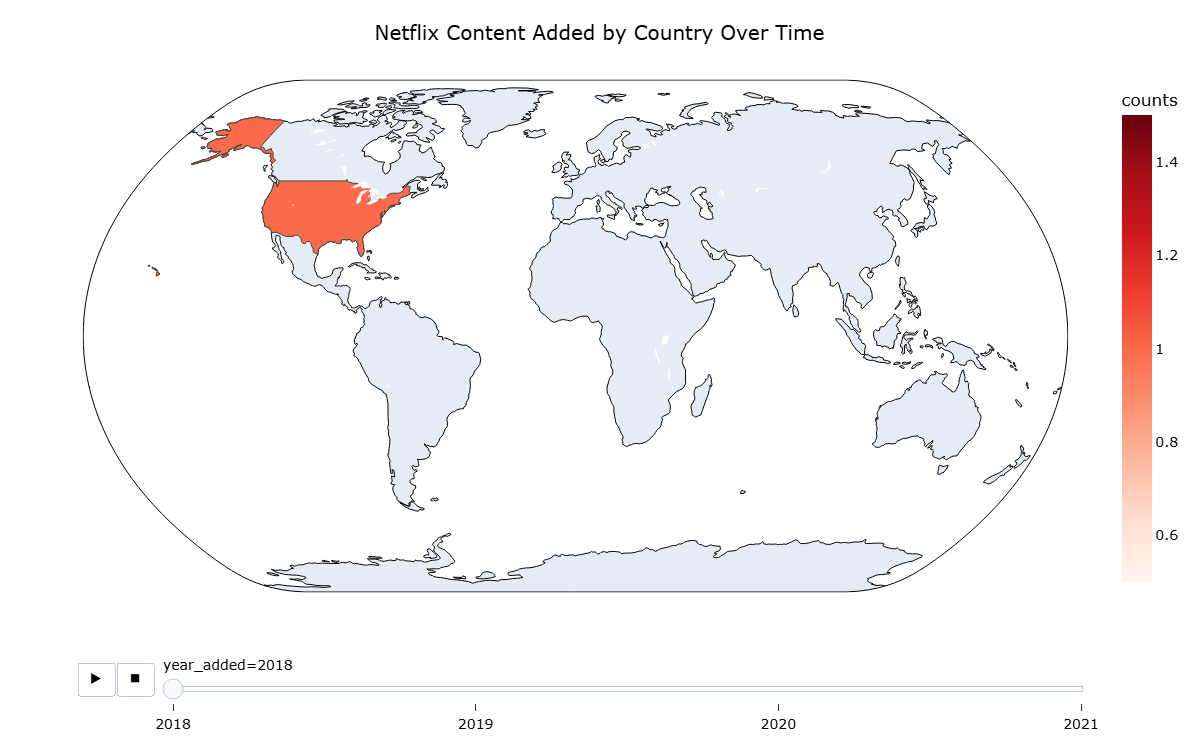

In [341]:
# Sample DataFrame
data = {
    'country': ['United States', 'United States', 'India', 'United Kingdom', 'Canada', 'United States', 'India', 'United Kingdom'],
    'year_added': [2018, 2019, 2019, 2020, 2020, 2021, 2021, 2021]
}
netflix_df = pd.DataFrame(data)

# Aggregate the data
df_grouped = netflix_df.groupby(['year_added', 'country']).size().reset_index(name='counts')

# Animated choropleth
fig = px.choropleth(
    df_grouped,
    locations="country",
    locationmode="country names",
    color="counts",
    hover_name="country",
    animation_frame="year_added",
    color_continuous_scale="Reds",   # Netflix red shades
    projection="natural earth",
    title="Netflix Content Added by Country and Year"
)

# Netflix-style layout
fig.update_layout(
    title_text="Netflix Content Added by Country Over Time",
    title_x=0.5,
    height=750,
    width=1200,
    margin=dict(l=60, r=60, t=80, b=60),
    paper_bgcolor="white",   # light red background
    plot_bgcolor="#FFCCCC",    # light red plot area
    font=dict(color="black", size=14),
    geo=dict(
        bgcolor="white",      # map background light red
        showframe=True,
        framecolor="black",
        showcoastlines=True,
        coastlinecolor="black"
    )
)

fig.show()


##### Creates a histogram plot using the Plotly Express library (px) to visualize the distribution of Netflix content by country. The 'country' column is used as the x-axis variable, and a histogram is constructed to show the frequency of content from different countries. Additionally, the plot includes box plot marginals, which display summary statistics (such as quartiles and outliers) for the distribution of content within each country.

### <span style="color:#FF0000"><b>10. Netflix Content and Growth:</b></span>

In [283]:
# Aggregate by year and type
content_trend = (
    netflix_data.groupby(['RELEASE_YEAR', 'TYPE'])
    .size()
    .reset_index(name='COUNT')
)

# Area chart
fig = px.area(
    content_trend,
    x="RELEASE_YEAR",
    y="COUNT",
    color="TYPE",
    title="Netflix Content Growth: Movies vs TV Shows",
    color_discrete_map={"Movie": "red", "TV Show": "black"}  # Netflix theme
)

# Layout updates: count axis right, legend left
fig.update_layout(
    height=600,
    width=1000,
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor="white",
    paper_bgcolor="white",
    yaxis=dict(
        side="right",
        title="Count"
    ),
    legend=dict(
        x=0,            # move to left
        y=1,            # align top
        xanchor="left", 
        yanchor="top",
        bgcolor="rgba(255,255,255,0.6)", # optional semi-transparent box
        bordercolor="black",
        borderwidth=1
    )
)

fig.show()


### <span style="color:#FF0000"><b>11. Top 10 Countries with the most Netflix content:</b></span>

In [284]:
# Aggregate count of content per country
country_counts = (
    netflix_data['COUNTRY']
    .value_counts()
    .nlargest(10)   # Top 10 countries
    .reset_index()
)

country_counts.columns = ['COUNTRY', 'COUNT']

# Bar chart (solid Netflix red)
fig = px.bar(
    country_counts,
    x="COUNTRY",
    y="COUNT",
    title="Top 10 Countries with Most Netflix Content",
    text="COUNT",                # show count on top of bar
    color_discrete_sequence=["#E50914"]  # Netflix red
)

# Layout adjustments
fig.update_traces(
    textposition="outside"  # values above bars
)

fig.update_layout(
    height=600,
    width=950,
    title_x=0.5,
    xaxis=dict(
        title="Country",
        showgrid=False,   # no vertical grid lines
        zeroline=False
    ),
    yaxis=dict(
        title="Number of Titles",
        showgrid=True,    # only horizontal grid lines
        gridcolor="lightgray",
        zeroline=False
    ),
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(color="black", size=14),
    title_font=dict(color="#E50914", size=24, family="Arial Black"),
    showlegend=False,     # remove legend
    bargap=0.25
)

# Show chart
fig.show()


### <span style="color:#FF0000"><b>12. Top 10 Countries Movies vs. TV Shows:</b></span>

In [285]:
# Count type distribution by country
country_type_counts = (
    netflix_data.groupby(["COUNTRY", "TYPE"])["SHOW_ID"]
    .count()
    .reset_index()
    .pivot(index="COUNTRY", columns="TYPE", values="SHOW_ID")
    .fillna(0)
)

# Keep top 10 countries by total content
country_type_counts["Total"] = country_type_counts.sum(axis=1)
top_countries = country_type_counts.sort_values("Total", ascending=False).head(10)

# Calculate percentages
top_countries["Movie %"] = (top_countries["Movie"] / top_countries["Total"] * 100).round(1)
top_countries["TV Show %"] = (top_countries["TV Show"] / top_countries["Total"] * 100).round(1)

# Custom sorting: India first, Egypt second, then rest by descending Total
ordered_countries = ["India", "Egypt"] + [
    c for c in top_countries.sort_values("Total", ascending=False).index 
    if c not in ["India", "Egypt"]
]
top_countries = top_countries.loc[ordered_countries]

# Plot stacked horizontal chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=top_countries.index,
    x=top_countries["Movie %"],
    orientation="h",
    marker=dict(color="crimson"),
    text=top_countries["Movie %"].astype(str) + "%",
    textposition="inside",
    name="Movies"
))

fig.add_trace(go.Bar(
    y=top_countries.index,
    x=top_countries["TV Show %"],
    orientation="h",
    marker=dict(color="black"),
    text=top_countries["TV Show %"].astype(str) + "%",
    textposition="inside",
    name="TV Shows"
))

fig.update_layout(
    barmode="stack",
    title="Movies vs TV Shows by Country (Top 10)",
    xaxis=dict(showticklabels=False, showgrid=False, title=""),  # ❌ no x-axis labels
    yaxis=dict(title="Country"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    height=500,   # ↓ decrease chart height
    legend=dict(
        title="Content Type",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()


 ### <span style="color:#FF0000"><b>13. 🎬 Average Age of Movies in Top 10 Countries:</b></span>

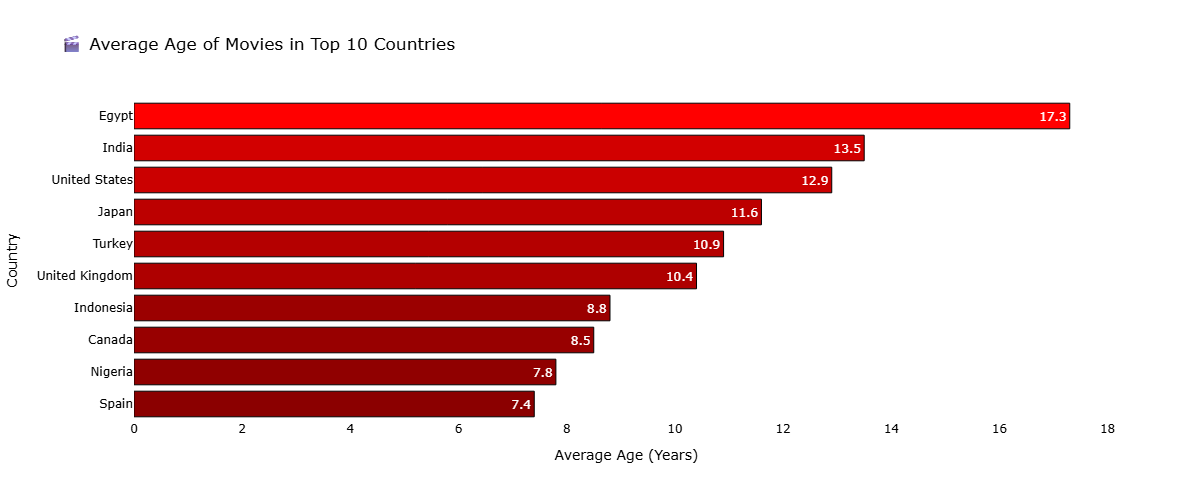

In [333]:
# Filter movies only
movies_df = netflix_data[netflix_data["TYPE"] == "Movie"].copy()

# Group by country: average release year + count
country_movie_stats = (
    movies_df.groupby("COUNTRY")
    .agg(
        avg_year=("RELEASE_YEAR", "mean"),
        count=("SHOW_ID", "count")
    )
    .dropna()
)

# Calculate average age (2025 - avg release year)
country_movie_stats["avg_age"] = (2025 - country_movie_stats["avg_year"]).round(1)

# Top 10 countries by number of movies
top10 = country_movie_stats.sort_values("count", ascending=False).head(10)

# Plot horizontal bar chart (avg_age) with Netflix theme
fig = px.bar(
    top10.sort_values("avg_age", ascending=True),  # oldest → newest
    x="avg_age",
    y=top10.sort_values("avg_age", ascending=True).index,
    orientation="h",
    text="avg_age",
    color="avg_age",
    color_continuous_scale=["#8B0000", "#FF0000"],  # dark red → bright red
    labels={"avg_age": "Average Age of Movies (Years)", "y": "Country"},
    title="🎬 Average Age of Movies in Top 10 Countries"
)

# Styling
fig.update_traces(
    marker_line_color="black",
    marker_line_width=1,
    textposition="inside",
    textfont=dict(color="white", size=12)
)

fig.update_layout(
    xaxis_title="Average Age (Years)",
    yaxis_title="Country",
    plot_bgcolor="white",        
    paper_bgcolor="white",
    font=dict(color="black"),    
    height=500,
    showlegend=False
)

# ✅ Remove color bar (right-side legend)
fig.update_coloraxes(showscale=False)

fig.show()


### <span style="color:#FF0000"><b>14. How Old Are The Content On Netflix?</b></span>
  #### <span style="color:#FF0000"><b>(a). Average Release vs Added Year for Movies (Top 10 Countries).</b></span>

In [287]:
# Function to plot release vs added year for Movies only
def plot_release_vs_added_movies(df):
    # Filter by type Movie
    subset = df[df["type"] == "Movie"].copy()

    # Convert columns
    subset["date_added"] = pd.to_datetime(subset["date_added"], errors="coerce")
    subset["release_year"] = pd.to_numeric(subset["release_year"], errors="coerce")

    # Group by country
    country_stats = (
        subset.groupby("country")
        .agg(
            avg_release=("release_year", "mean"),
            avg_added=("date_added", lambda x: x.dt.year.mean())
        )
        .dropna()
    )

    # Top 10 countries by count
    top10 = (
        subset.groupby("country")["show_id"].count()
        .sort_values(ascending=False).head(10).index
    )
    top10_stats = country_stats.loc[country_stats.index.isin(top10)]

    # Sort by release year for nice ordering
    top10_stats = top10_stats.sort_values("avg_release", ascending=True)

    fig = go.Figure()

    # Line between release and added
    for i, row in top10_stats.iterrows():
        fig.add_trace(go.Scatter(
            x=[row["avg_release"], row["avg_added"]],
            y=[i, i],
            mode="lines",
            line=dict(color="lightgray", width=2),
            showlegend=False
        ))

    # Release year points (gray)
    fig.add_trace(go.Scatter(
        x=top10_stats["avg_release"],
        y=top10_stats.index,
        mode="markers",
        marker=dict(color="gray", size=12),
        name="Released"
    ))

    # Added year points (red)
    fig.add_trace(go.Scatter(
        x=top10_stats["avg_added"],
        y=top10_stats.index,
        mode="markers",
        marker=dict(color="crimson", size=12),
        name="Added"
    ))

    fig.update_layout(
        title="Average Release vs Added Year for Movies (Top 10 Countries)",
        xaxis_title="Year",
        yaxis_title="Country",
        plot_bgcolor="white",
        paper_bgcolor="white",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        height=600
    )

    return fig

# Generate chart for Movies
movies_chart = plot_release_vs_added_movies(df)
movies_chart.show()


#### <span style="color:#FF0000"><b>(b). Average Release vs Added Year (TV Shows - Top 10 Countries)</b></span>

In [288]:
# Function to create Released vs Added chart for TV Shows
def plot_release_vs_added_tvshows(netflix_data):
    # Keep only TV Shows
    tvshows = netflix_data[netflix_data["TYPE"] == "TV Show"].copy()

    # Ensure correct datetime format
    tvshows["RELEASE_YEAR"] = pd.to_numeric(tvshows["RELEASE_YEAR"], errors="coerce")
    tvshows["DATE_ADDED"] = pd.to_datetime(tvshows["DATE_ADDED"], errors="coerce")

    # Drop missing values
    tvshows = tvshows.dropna(subset=["RELEASE_YEAR", "DATE_ADDED", "COUNTRY"])

    # Group by country
    tvshows_grouped = (
        tvshows.groupby("COUNTRY")
        .agg(
            Avg_Release_Year=("RELEASE_YEAR", "mean"),
            Avg_Added_Year=("DATE_ADDED", lambda x: x.dt.year.mean())
        )
        .reset_index()
    )

    # Top 10 countries with most TV Shows
    top10_countries = (
        tvshows["COUNTRY"].value_counts().head(10).index
    )
    tvshows_grouped = tvshows_grouped[tvshows_grouped["COUNTRY"].isin(top10_countries)]

    # Sort by Avg_Release_Year
    tvshows_grouped = tvshows_grouped.sort_values("Avg_Release_Year")

    # Plot
    fig = go.Figure()

    for _, row in tvshows_grouped.iterrows():
        fig.add_trace(go.Scatter(
            x=[row["Avg_Release_Year"], row["Avg_Added_Year"]],
            y=[row["COUNTRY"], row["COUNTRY"]],
            mode="lines+markers",
            line=dict(color="gray"),
            marker=dict(size=12, color=["#4B4E6D", "crimson"]),
            name=row["COUNTRY"],
            showlegend=False
        ))

    # Add legend manually
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode="markers", marker=dict(color="#4B4E6D", size=12),
        name="Released"
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode="markers", marker=dict(color="crimson", size=12),
        name="Added"
    ))

    fig.update_layout(
        title="Average Release vs Added Year (TV Shows - Top 10 Countries)",
        xaxis_title="Year",
        yaxis_title="Country",
        plot_bgcolor="white",
        paper_bgcolor="white"
    )

    return fig


# ✅ Use your dataset
tvshows_chart = plot_release_vs_added_tvshows(netflix_data)
tvshows_chart.show()


#### <span style="color:#FF0000"><b>15. Netflix Ratings Distribution: Movies vs TV Shows:</b></span>

In [289]:
# Ratings distribution
rating_counts = netflix_data.groupby(["RATING", "TYPE"])["SHOW_ID"].count().reset_index()

fig1 = px.bar(
    rating_counts,
    x="RATING",
    y="SHOW_ID",
    color="TYPE",
    barmode="stack",
    text="SHOW_ID",
    title="Ratings Distribution: Movies vs TV Shows",
    color_discrete_map={"Movie": "crimson", "TV Show": "black"}
)

fig1.update_layout(
    xaxis_title="Rating",
    yaxis_title="Count",
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig1.show()


### <span style="color:#FF0000"><b>16. Training and Testing:</b></span>   

#### Data Preparation for Netflix Content Classification

##### The separation of feature data (X) from the target variable (Y) is a fundamental step in machine learning and classification tasks. It allows for the training of classification models that predict the content type of Netflix entries based on the available features and attributes.

In [290]:
x = netflix_data.drop(['TYPE'], axis='columns')
y = netflix_data[['TYPE']]

##### Data Splitting into Training and Testing Sets

##### Splitting the dataset into training and testing sets is a crucial step in machine learning, enabling the development and evaluation of predictive models.



In [291]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### <span style="color:#FF0000"><b>17. Random Forest Classifier for Predictive Modeling:</b></span>  

In [292]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Drop columns that are not useful for prediction
drop_cols = ["SHOW_ID", "TITLE", "DESCRIPTION", "CAST", "DIRECTOR", "DATE_ADDED"]
df = netflix_data.drop(columns=drop_cols)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Define features and target
X = df.drop("TYPE", axis=1)   # Example: predicting TYPE (Movie vs TV Show)
y = df["TYPE"]

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy:.2f}")


Accuracy of the RandomForestClassifier on the test set: 1.00


### <span style="color:#FF0000"><b>Conclusion:</b></span>  

##### I truly enjoyed participating in the Meta Data Challenge 2022 and analyzing the Netflix dataset.
##### Netflix continues to grow in popularity across age groups and social classes, shaping global entertainment trends.
##### Its influence on the entertainment industry and economy is significant and worth studying further.
##### I hope you enjoyed reading my analysis as much as I enjoyed creating it!